<a href="https://colab.research.google.com/github/sravanirachamalla/MLA2021/blob/main/group_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/car_data.xls")

In [ ]:
features=df.columns #creating list of features
features=features.drop('S. No.') #dropping serial no.

In [ ]:
features_num=[i for i in features if df[i].dtype!='O'] #creating list of only numerical features
features_num

['wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [ ]:
features_cat=[i for i in features if df[i].dtype=='O']

In [ ]:
df_encoded=pd.get_dummies(df[features],columns=list(features_cat)) #encoding all categorical features

In [ ]:
encoded_features=df_encoded.columns #creating series of features of encoded
len(encoded_features)

73

In [ ]:
for i in features_num:
  for j in features_num:
    print(df[[i,j]].corr())
 

            wheel_base  wheel_base
wheel_base         1.0         1.0
wheel_base         1.0         1.0
            wheel_base    length
wheel_base    1.000000  0.874587
length        0.874587  1.000000
            wheel_base     width
wheel_base    1.000000  0.795144
width         0.795144  1.000000
            wheel_base    height
wheel_base    1.000000  0.589435
height        0.589435  1.000000
             wheel_base  curb_weight
wheel_base     1.000000     0.776386
curb_weight    0.776386     1.000000
             wheel_base  engine_size
wheel_base     1.000000     0.569329
engine_size    0.569329     1.000000
                   wheel_base  compression_ratio
wheel_base           1.000000           0.249786
compression_ratio    0.249786           1.000000
            wheel_base  horsepower
wheel_base    1.000000    0.353477
horsepower    0.353477    1.000000
            wheel_base  peak_rpm
wheel_base    1.000000 -0.343619
peak_rpm     -0.343619  1.000000
            wheel_base  c

In [ ]:
encoded_features=df_encoded.columns
type(encoded_features)

pandas.core.indexes.base.Index

In [ ]:
encoded_features_ind=list((set(encoded_features))-(set('price')))
encoded_features_ind.remove('price')

In [ ]:
for i in encoded_features_ind:
  if i=='price':
    print('found')

In [ ]:
features_ind_num=[i for i in features if df[i].dtype !='O']

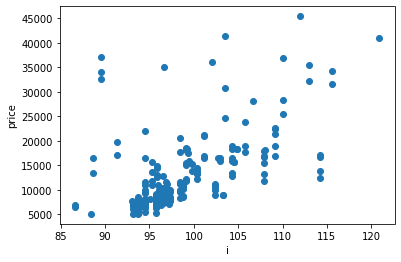

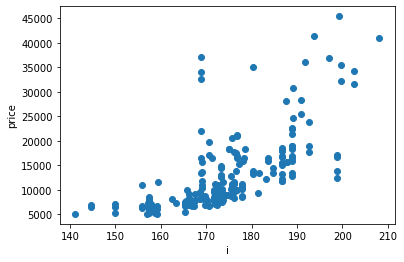

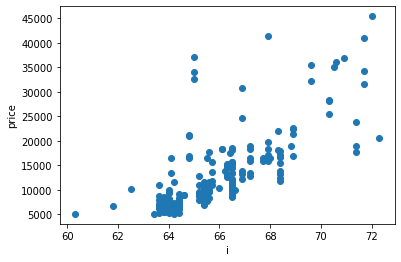

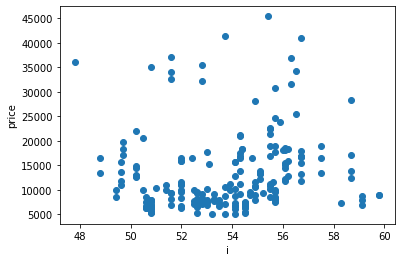

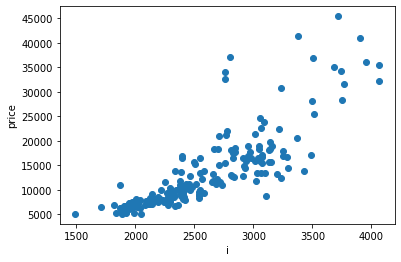

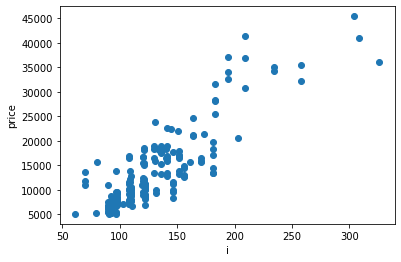

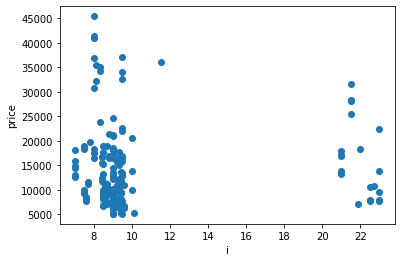

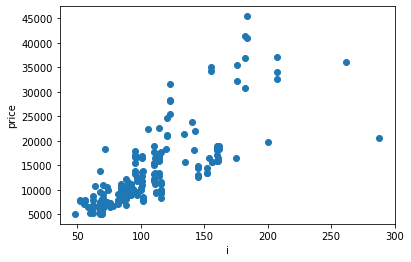

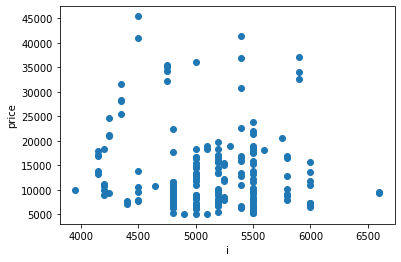

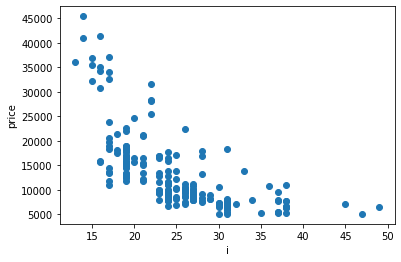

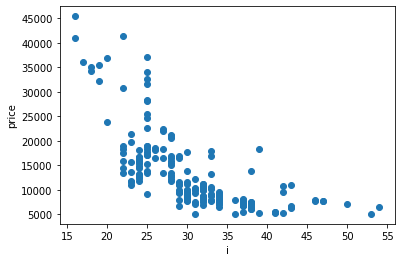

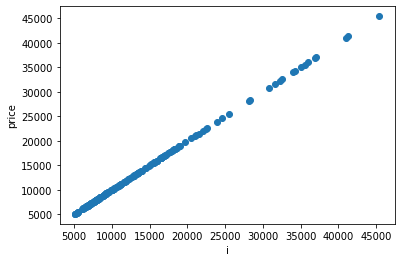

In [ ]:
 for i in features_ind_num: #for exploring the relationship between independent numeric variables to the outcome
  dataset=df.copy()
  plt.scatter(df[i],df['price'])
  plt.xlabel('i')
  plt.ylabel('price')
  plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
X=sm.add_constant(df_encoded[encoded_features_ind]) #independent encoded variables

In [ ]:
Y=df_encoded['price']
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7) #creating train and test datasets

In [ ]:
mod_1=sm.OLS(y_train, X_train).fit() #fitting the model

In [ ]:
mod_1.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.945     
Dependent Variable:       price                 AIC:                     2618.5015 
Date:                     2021-08-29 11:21      BIC:                     2775.5323 
No. Observations:         143                   Log-Likelihood:          -1256.3   
Df Model:                 52                    F-statistic:             47.60     
Df Residuals:             90                    Prob (F-statistic):      9.17e-48  
R-squared:                0.965                 Scale:                   3.9733e+06
-----------------------------------------------------------------------------------
                           Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------------
const                   -11801.8493 5920.7549 -1.9933 0.0493 -23564.4622   -39.2363
make_peugot              -2382.2152 1289.5187 -1.8474 0.0680  -4944.0691   179.6388
engine_type_l            -3238.5727 1315.7537 -2.4614 0.0157  -5852.5471  -624.5982
engine_type_ohcf          -980.1646 1842.7853 -0.5319 0.5961  -4641.1792  2680.8500
make_toyota              -1737.5346  735.7323 -2.3616 0.0204  -3199.1952  -275.8741
make_isuzu               -2485.9949 1672.9506 -1.4860 0.1408  -5809.6033   837.6136
engine_type_ohcv         -4758.6872 1499.8892 -3.1727 0.0021  -7738.4788 -1778.8955
length                    -176.5941   77.7624 -2.2709 0.0255   -331.0826   -22.1056
fuel_system_spdi         -2660.4770 1523.1753 -1.7467 0.0841  -5686.5307   365.5766
make_bmw                  6175.5575 1472.9856  4.1925 0.0001   3249.2145  9101.9004
body_style_convertible    -963.0418 1395.1474 -0.6903 0.4918  -3734.7457  1808.6621
num_of_cylinders_five    -6265.9161 1862.4338 -3.3644 0.0011  -9965.9659 -2565.8663
fuel_system_4bbl         -3184.9673 2459.7872 -1.2948 0.1987  -8071.7639  1701.8293
aspiration_turbo         -4775.8335 3005.7147 -1.5889 0.1156 -10747.2102  1195.5433
body_style_hatchback     -3461.7891 1318.8392 -2.6249 0.0102  -6081.8934  -841.6848
num_of_cylinders_six     -4218.7060 1540.3587 -2.7388 0.0074  -7278.8974 -1158.5146
drive_wheels_fwd         -4255.7212 2246.3607 -1.8945 0.0614  -8718.5089   207.0664
body_style_sedan         -2598.3196 1447.0294 -1.7956 0.0759  -5473.0960   276.4569
make_saab                 6468.4654 2192.2774  2.9506 0.0040   2113.1237 10823.8071
height                    -223.0506  182.2608 -1.2238 0.2242   -585.1435   139.0423
num_of_cylinders_two      -293.5476 1467.7759 -0.2000 0.8419  -3209.5406  2622.4455
engine_type_dohc         -2504.9588 1335.3180 -1.8759 0.0639  -5157.8011   147.8835
num_of_cylinders_four    -7025.4362 2048.9242 -3.4288 0.0009 -11095.9818 -2954.8906
fuel_system_1bbl         -2770.5053 1902.8301 -1.4560 0.1489  -6550.8094  1009.7989
make_dodge               -3553.7673 1324.9203 -2.6822 0.0087  -6185.9527  -921.5818
fuel_system_mfi          -3422.9971 2338.6373 -1.4637 0.1468  -8069.1083  1223.1140
engine_location_front   -11983.6385 3774.5054 -3.1749 0.0021 -19482.3523 -4484.9246
make_jaguar              -1788.8323 3100.3464 -0.5770 0.5654  -7948.2116  4370.5470
make_porsche              3601.0349 2633.5599  1.3674 0.1749  -1630.9915  8833.0613
num_of_doors_two         -5939.4434 2996.9754 -1.9818 0.0506 -11893.4583    14.5714
width                      987.1594  392.3523  2.5160 0.0136    207.6831  1766.6358
num_of_cylinders_twelve   3575.3489 5180.8486  0.6901 0.4919  -6717.3111 13868.0090
drive_wheels_rwd         -3519.8486 2139.6844 -1.6450 0.1035  -7770.7052   731.0080
make_volvo               -1521.2390 1380.6456 -1.1018 0.2735  -4264.1325  1221.6544
fuel_system_mpfi          -461.6687 1132.2004 -0.4078 0.6844  -2710.9825  1787.6451
make_subaru              -116

In [ ]:
sig_Features=['price','wheel_base','curb_weight','drive_wheels_4wd','make_plymouth','aspiration_std','peak_rpm','fuel_type_gas','engine_size','make_mitsubishi','make_alfa-romero','width','engine_location_front','make_dodge','num_of_cylinders_four','engine_type_l','make_toyota','length','make_bmw']

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=mod_1.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))

0.7027786969725371


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

3309.248892878459

**Model Diagnostics**

In [ ]:
model_1_resid=mod_1.resid

In [ ]:
probplot=sm.ProbPlot(model_1_resid)


Text(0.5, 1.0, 'Normal P-P plot of regression standardized residuals')

<Figure size 576x432 with 0 Axes>

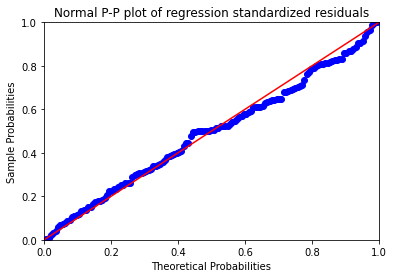

In [ ]:
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P plot of regression standardized residuals")

**Test of Homoscedasticity**

In [ ]:
def standardized_values(vals):
  return (vals-vals.mean())/vals.std()


Text(0.5, 1.0, 'Residual Plot')

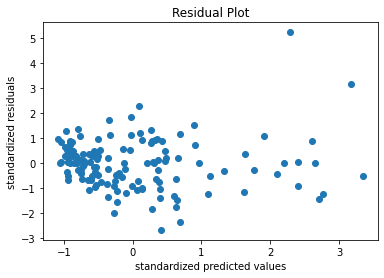

In [ ]:
plt.scatter(standardized_values(mod_1.fittedvalues),standardized_values(mod_1.resid))
plt.xlabel('standardized predicted values')
plt.ylabel('standardized residuals')
plt.title('Residual Plot')

**Outlier analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import zscore
data=df_encoded.copy()
data['z_score_price']=zscore(data['price'])
data[(data['z_score_price']>3) | (data['z_score_price']<-3)]


,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,num_of_doors_?,num_of_doors_four,num_of_doors_two,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_eight,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,z_score_price
16,103.5,193.8,67.9,53.7,3380,209,8.0,182,5400,16,22,41315,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.564839
17,110.0,197.0,70.9,56.3,3505,209,8.0,182,5400,15,20,36880,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.002214
73,120.9,208.1,71.7,56.7,3900,308,8.0,184,4500,14,16,40960,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.519804
74,112.0,199.2,72.0,55.4,3715,304,8.0,184,4500,14,16,45400,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.083063
128,89.5,168.9,65.0,51.6,2800,194,9.5,207,5900,17,25,37028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.020989


In [ ]:
#data.drop(index=[16,17,73,74,128],inplace=True)
data.head()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,num_of_doors_?,num_of_doors_four,num_of_doors_two,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_eight,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,z_score_price
0,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.035588
1,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.416803
2,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,19,26,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.416803
3,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.093310
4,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.537320


**Leverage Distance**

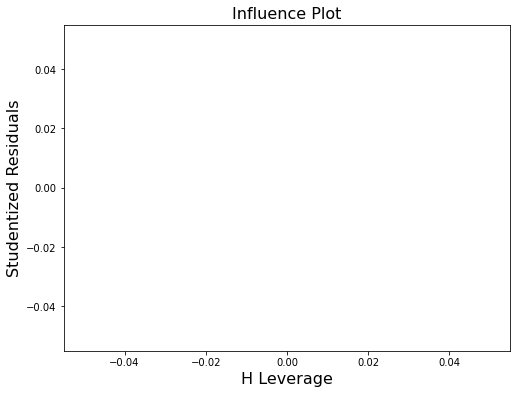

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(8,6))
influence_plot(mod_1,ax=ax)
plt.show() #we could see that there is no influence now of predicted value on fit of the model

Text(0, 0.5, 'Cooks Distance')

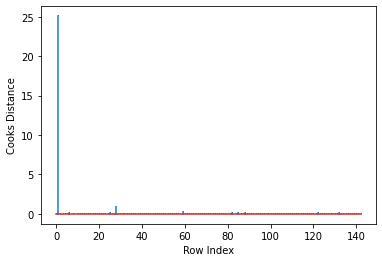

In [ ]:
df_encoded_influence= mod_1.get_influence()
(c,p)=df_encoded_influence.cooks_distance
plt.stem(np.arange(len(X_train)),np.round(c,3),markerfmt=",")
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')


**Building model_2 by using significant features**


In [ ]:
df_sig_mod2=df_encoded[sig_Features]

In [ ]:
'price' in df_sig_mod2.columns

True

In [ ]:
df_sig_mod2_ind=df_sig_mod2.drop('price',axis=1)

In [ ]:
'price' in df_sig_mod2_ind.columns

False

In [ ]:
X_1=sm.add_constant(df_sig_mod2_ind)
Y_1=df_sig_mod2['price']

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,Y_1,train_size=0.7) #creating train and test datasets

In [ ]:
sig_mod_2=sm.OLS(y1_train, X1_train).fit() 

In [ ]:
sig_mod_2.summary2() #there is decrease in accuracy

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.904     
Dependent Variable:       price                 AIC:                     2669.4836 
Date:                     2021-08-29 12:54      BIC:                     2725.7776 
No. Observations:         143                   Log-Likelihood:          -1315.7   
Df Model:                 18                    F-statistic:             75.08     
Df Residuals:             124                   Prob (F-statistic):      9.90e-58  
R-squared:                0.916                 Scale:                   6.6270e+06
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------
const                 -43604.6398 12943.0853 -3.3690 0.0010 -69222.6312 -17986.6485
wheel_base               318.5007    88.8889  3.5831 0.0005    142.5647    494.4367
curb_weight                2.2747     1.5943  1.4268 0.1562     -0.8809      5.4302
drive_wheels_4wd         470.9122  1325.0988  0.3554 0.7229  -2151.8296   3093.6539
make_plymouth          -2046.9850  1382.4636 -1.4807 0.1412  -4783.2677    689.2976
aspiration_std         -2182.2210   766.0489 -2.8487 0.0051  -3698.4464   -665.9956
peak_rpm                   1.5815     0.5770  2.7408 0.0070      0.4394      2.7236
fuel_type_gas            -41.0602  1061.4408 -0.0387 0.9692  -2141.9488   2059.8284
engine_size               87.7621    13.2283  6.6344 0.0000     61.5795    113.9447
make_mitsubishi        -2121.3120  1005.6563 -2.1094 0.0369  -4111.7874   -130.8366
make_alfa-romero        6286.6774  2027.2382  3.1011 0.0024   2274.2052  10299.1496
width                    504.1686   239.1089  2.1085 0.0370     30.9050    977.4321
engine_location_front -15606.8349  2819.6305 -5.5351 0.0000 -21187.6736 -10025.9963
make_dodge             -1658.8432  1081.0051 -1.5345 0.1274  -3798.4552    480.7687
num_of_cylinders_four  -1464.9970   809.0574 -1.8107 0.0726  -3066.3484    136.3543
engine_type_l          -3324.1022  1164.7937 -2.8538 0.0051  -5629.5553  -1018.6492
make_toyota             -806.1505   668.0973 -1.2066 0.2299  -2128.5023    516.2013
length                   -83.1649    51.7962 -1.6056 0.1109   -185.6841     19.3543
make_bmw                8346.7492  1207.3673  6.9132 0.0000   5957.0310  10736.4674
-----------------------------------------------------------------------------------
Omnibus:                    22.106             Durbin-Watson:                1.951 
Prob(Omnibus):              0.000              Jarque-Bera (JB):             48.292
Skew:                       0.639              Prob(JB):                     0.000 
Kurtosis:                   5.544              Condition No.:                345646
===================================================================================
* The condition number is large (3e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""